In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from numpy.linalg import norm
from vis_lorenz_LRDelta import read_csv

In [2]:
def flip_vecs(vecs):
    for i in range(1, vecs.shape[0]):
        for j in range(vecs.shape[1]):
            flip = norm(vecs[i, j] + vecs[i-1, j]
                        ) < norm(vecs[i, j] - vecs[i-1, j])
            if flip:
                vecs[i, j] *= -1
    return vecs

In [3]:
us = read_csv("drive-ks-seq.out")
vs = read_csv("drive-ks-lv-seq.out")
u = read_csv("drive-ks.out")
v = read_csv("drive-ks-lv.out")

nt, nx = u.shape
rank = v.shape[1] // nx
# v = flip_vecs(v.reshape(nt, rank, nx))
# vs = flip_vecs(vs.reshape(nt, rank, nx))
v = v.reshape(nt, rank, nx)
vs = vs.reshape(nt, rank, nx)

In [4]:
vs.shape

(513, 18, 128)

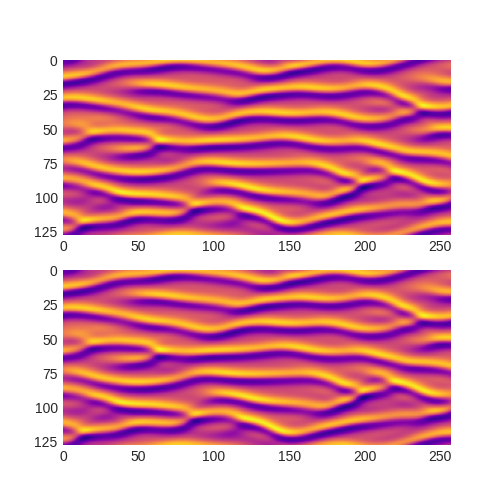

In [5]:
stride = 2
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5,5))
ax1.imshow(u[::stride].T, cmap="plasma", aspect="auto")
ax2.imshow(us[::stride].T, cmap="plasma", aspect="auto")
ax1.grid(False)
ax2.grid(False)
plt.show()

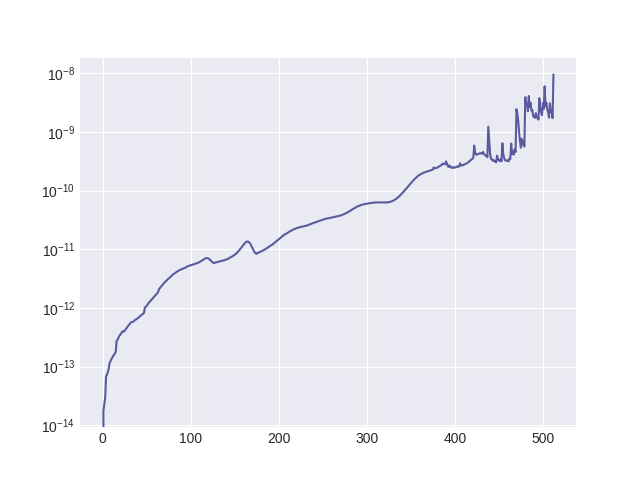

In [6]:
plt.figure()
plt.semilogy(np.linalg.norm(u - us, axis=1))
plt.show()

interactive(children=(IntSlider(value=0, description='ind', max=17), Output()), _dom_classes=('widget-interact…

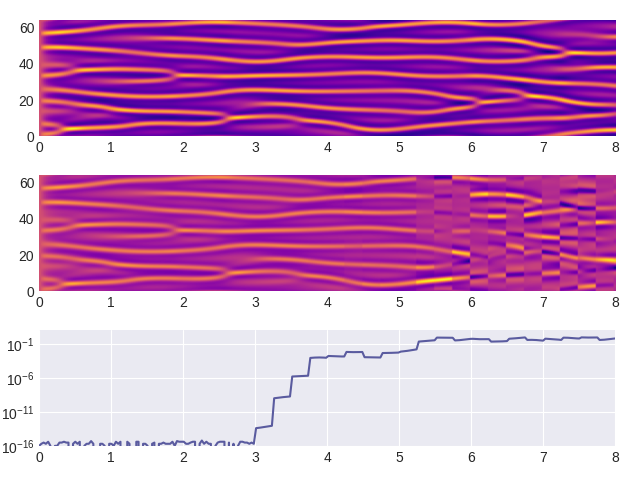

In [7]:
extent = (0, 8, 0, 64)
x, t = np.linspace(0, 64, num=nx), np.linspace(0, 8, num=nt//stride)
X, T = np.meshgrid(x, t)

fig, axs = plt.subplots(3, 1)
(ax1, ax2, ax3) = axs
fig.tight_layout()
# ax1.imshow(u[::stride], cmap="viridis", extent=extent, aspect="auto")
# ax2.s(us[::stride], cmap="viridis", extent=extent, aspect="auto")

@widgets.interact(ind=(0, rank-1, 1))
def update(ind=0):
    [ax.cla() for ax in axs]
    ax1.imshow(vs[::stride, ind, :].T, cmap="plasma", aspect="auto", extent=extent)
    ax2.imshow(v[::stride, ind, :].T, cmap="plasma", aspect="auto", extent=extent)
    err = [norm(1 - np.abs(np.dot(v[i, ind], vs[i, ind].T))) for i in range(nt-1)]
    # err = [norm(v[i, ind] - vs[i, ind])/norm(vs[i, ind]) for i in range(nt-1)]
    ax3.semilogy(t, err[::stride])
    ax3.set_ylim((1e-16, 1e1))
    ax3.set_xlim((0, 8))
    ax1.grid(False)
    ax2.grid(False)
    # ax1.contour(X, T, vs[:-(1+nt%2):stride, ind])
    # ax2.contour(X, T, v[:-(1+nt%2):stride, ind])


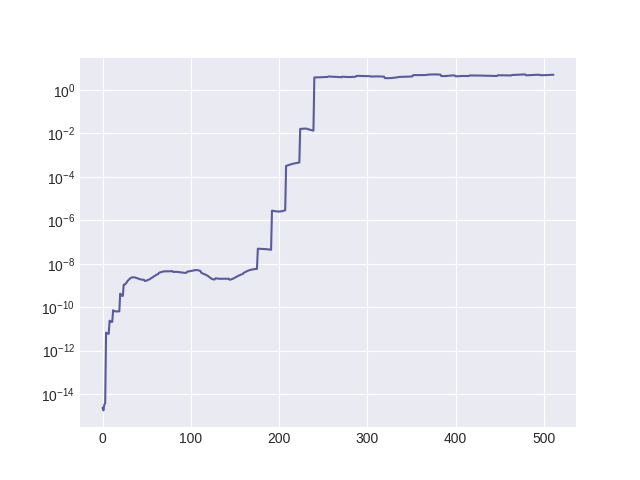

In [8]:
inds = range(12)
orth = [norm(np.eye(rank) - v[i, ...] @ v[i, ...].T) for i in range(nt-1)]
err = [norm(np.eye(inds[-1]+1) - np.dot(v[i, inds], vs[i, inds].T)) for i in range(nt-1)]

plt.figure()
plt.semilogy(err)
plt.show()

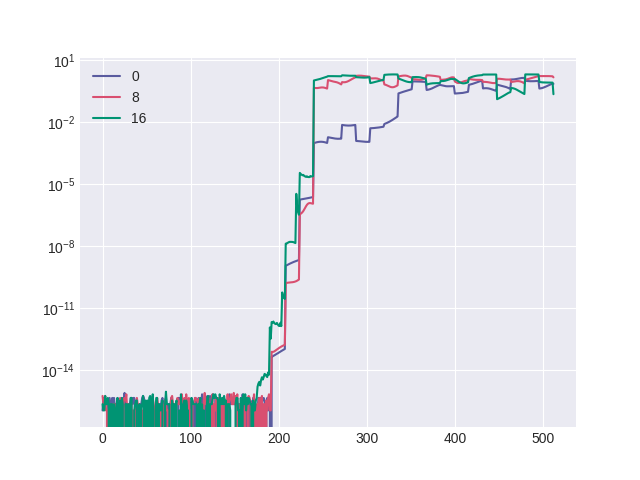

In [9]:
def modarcos(arg):
    return np.arccos(np.pi*(arg % np.pi))
plt.figure()
errs = np.zeros(rank)
for j in range(0, rank, 8):
    plt.semilogy(np.abs([1 - np.dot(vs[i, j], v[i, j].T) for i in range(nt)]), label=f"{j}")
    # errs[j] = np.arccos(np.clip([np.dot(vs[i, j], v[i, j].T) for i in range(nt)], -1, 1)

# plt.semilogy(errs)
plt.legend()
plt.show()

In [10]:
j = 1
np.arccos(np.clip([np.dot(vs[i, j], v[i, j].T) for i in range(nt)], -1, 1))

array([0.00000000e+00, 1.49011612e-08, 1.49011612e-08, 0.00000000e+00,
       2.10734243e-08, 2.58095683e-08, 0.00000000e+00, 0.00000000e+00,
       1.49011612e-08, 1.49011612e-08, 3.33200094e-08, 1.49011612e-08,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.58095683e-08, 0.00000000e+00, 0.00000000e+00, 2.58095683e-08,
       0.00000000e+00, 0.00000000e+00, 2.10734243e-08, 2.10734243e-08,
       0.00000000e+00, 0.00000000e+00, 1.49011612e-08, 0.00000000e+00,
       2.98023224e-08, 2.98023224e-08, 0.00000000e+00, 1.49011612e-08,
       0.00000000e+00, 0.00000000e+00, 2.58095683e-08, 1.49011612e-08,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.58095683e-08,
       0.00000000e+00, 2.10734243e-08, 3.33200094e-08, 0.00000000e+00,
       2.58095683e-08, 2.98023224e-08, 2.10734243e-08, 1.49011612e-08,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.49011612e-08,
       1.49011612e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [11]:
2*np.pi*(23.3 % (2*np.pi))

27.96296484421207

In [12]:
100.3 % (2*np.pi)

6.052220392306204

In [13]:
100.3 / np.pi

31.926481584234203